# Jonathan Bunch
### 2 June 2021
### DSC540--Final Project Milestone 5
---
# Project Summary and Reflection

This project involved several modules and many techniques that I had no previous experience with.  The requirement of
having three different data sources was definitely one of the biggest challenges for me.  I have worked primarily with
flat file sources, and only used a handful of APIs.  The web table source was something I had never seen, and web
scraping in general was a new topic for me.  It took quite a bit of research to understand the HTML structure and how
to parse it effectively.

Once I managed to get the data sets imported, most of the transformation/cleaning steps that I performed were fairly
straightforward.  The biggest task overall was definitely cleaning up strings—both in the column names and in the
county name data.  Since I was planning to use the county names as the key for joining the data sets, I knew it would
be important to keep my formatting completely consistent.  This project was a great refresher on string methods; it had
been a long time since I used most of them.  I also gained a lot of useful experience using the “apply()” method to
apply various functions to my data frames.

Another big challenge for me was the database portion of the project.  I did not have any experience working with SQL
or databases, so this was a lot of new material to absorb.  The modules I was using (pandas, sqlite3) have convenient
methods for accomplishing most of the tasks I needed to accomplish, but I still need to spend much more time studying
the underlying concepts.  I enjoyed finally learning some SQL, though some of the more advanced topics from the
textbook are still difficult for me to understand.  Completing this project has given me enough knowledge to continue
practicing working with my own databases, and I look forward to exploring SQL and database manipulation in more depth.

Finally, the visualizations portion of the project lead me to research a number of new features/options of Matplotlib.
I have used this module quite a bit, but I typically only produce basic plots with default settings.  This was a great
opportunity to explore the module’s capabilities in more depth, and get some practice using more advanced plotting and
layout manipulation.

Overall, I thought this project, and the course as a whole, was very effective.  Some courses I have taken used
proprietary modules and functions, and I really appreciated that this course’s content always focused on using common,
industry accepted modules.  I believe this makes the skills and knowledge we have learned in this course far more
relevant to the real-world applications we can expect in the professional world.  Thank you for all of your feedback
along the way!

Data Sources:
 - https://bison.usgs.gov/#api
 - https://dos.myflorida.com/elections/data-statistics/voter-registration-statistics/voter-registration-reportsxlsx/voter-registration-by-county-and-party/
 - https://geodata.dep.state.fl.us/datasets/60f9a1f29bd24caea9af6db36e0f4170_0?geometry=-97.119%2C24.608%2C-69.324%2C31.392

# Import Prepared data sets

I will start by importing the data sets I prepared in the previous milestones. I saved the finished dataframes
from those milestones using the "to_csv()" function so I wouldn't have to include the previously submitted code. Here is
a brief summary of the information contained in each data set:
 - animal_data: Reported observations of three wildlife species by county: American aligator, gopher tortoise, and
 wood stork. These animals are all considered indicator species for ecosystem health.
 - haz_data: Aggregate data providing the total number of (no-longer-operating) hazardous waste handlers in each
 county.
 - voter_data: Provides the number of registered voters in each party, in each county.

In [4]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

# Read my three data sets into pandas dataframes.
animal_data = pd.read_csv('animal_observation_data.csv')
haz_data = pd.read_csv('hazardous_waste_data.csv')
voter_data = pd.read_csv('voter_registration_data.csv')

# Make sure everything still looks good.
print(animal_data.head())
print(haz_data.head())
print(voter_data.head())

     county  stork_count  tortoise_count  aligator_count
0   alachua         7560             509            1153
1     baker           22              10               5
2       bay           19              16              14
3  bradford           16              14               2
4   brevard        15688             194             284
     county  haz_waste_prods
0   alachua              210
1     baker               10
2       bay               76
3  bradford               20
4   brevard              622
     county  republican  democrat  minor_party  no_party  totals
0   alachua       51428     94991         3012     43890  193321
1     baker       10702      4420          172      2017   17311
2       bay       67625     29906         2531     27278  127340
3  bradford        9578      5476          174      2679   17907
4   brevard      193203    138446        10317    115936  457902


## Connect to my database and create a new table from each of the three dataframes

In [5]:
# Open a connection to my project database. Once the connection is open, we can use the "to_sql()" dataframe method to
# create a new table from each dataframe.
with sqlite3.connect("bunch_project_db") as conn:
    animal_data.to_sql('animal_obs', con=conn, index=False)
    voter_data.to_sql('voter_reg', con=conn, index=False)
    haz_data.to_sql('haz_waste', con=conn, index=False)
    conn.commit()

## Check the newly created tables

In [18]:
# Connect to my database and fetch the first 5 rows of each table.
with sqlite3.connect("bunch_project_db") as conn:
    cur = conn.cursor()
    print("animal_obs table:")
    for a in cur.execute("pragma table_info('animal_obs')").fetchall():
        print("Column Name:", a[1], "      Data Type: ", a[2])
    print("sample rows:")
    for ar in cur.execute("SELECT * FROM animal_obs").fetchmany(3):
        print(ar)
    print("\nhaz_waste table:")
    for h in cur.execute("pragma table_info('haz_waste')").fetchall():
        print("Column Name:", h[1], "      Data Type: ", h[2])
    print("sample rows:")
    for ha in cur.execute("SELECT * FROM haz_waste").fetchmany(3):
        print(ha)
    print("\nvoter_reg table:")
    for v in cur.execute("pragma table_info('voter_reg')").fetchall():
        print("Column Name:", v[1], "      Data Type: ", v[2])
    print('sample rows:')
    for va in cur.execute("SELECT * FROM voter_reg").fetchmany(3):
        print(va)

animal_obs table:
Column Name: county       Data Type:  TEXT
Column Name: stork_count       Data Type:  INTEGER
Column Name: tortoise_count       Data Type:  INTEGER
Column Name: aligator_count       Data Type:  INTEGER
sample rows:
('alachua', 7560, 509, 1153)
('baker', 22, 10, 5)
('bay', 19, 16, 14)

haz_waste table:
Column Name: county       Data Type:  TEXT
Column Name: haz_waste_prods       Data Type:  INTEGER
sample rows:
('alachua', 210)
('baker', 10)
('bay', 76)

voter_reg table:
Column Name: county       Data Type:  TEXT
Column Name: republican       Data Type:  INTEGER
Column Name: democrat       Data Type:  INTEGER
Column Name: minor_party       Data Type:  INTEGER
Column Name: no_party       Data Type:  INTEGER
Column Name: totals       Data Type:  INTEGER
sample rows:
('alachua', 51428, 94991, 3012, 43890, 193321)
('baker', 10702, 4420, 172, 2017, 17311)
('bay', 67625, 29906, 2531, 27278, 127340)


## Join the tables

The tables appear to have written to the database correctly, so now I can work on combining them. The "county" column
of all three tables should align.

In [20]:
# First I will create the SQL query. This query joins the three tables on the "county" columns and creates a new table
# called "combined_data" from the selected columns.
sql_j = """
CREATE TABLE combined_data AS SELECT animal_obs.county, animal_obs.stork_count, animal_obs.tortoise_count,
animal_obs.aligator_count, haz_waste.haz_waste_prods, voter_reg.republican, voter_reg.democrat, voter_reg.minor_party,
voter_reg.no_party, voter_reg.totals FROM ((animal_obs
JOIN haz_waste ON animal_obs.county = haz_waste.county)
JOIN voter_reg ON animal_obs.county = voter_reg.county)
"""

# Execute the query and commit to the database.
with sqlite3.connect("bunch_project_db") as conn:
    cur = conn.cursor()
    cur.execute(sql_j)
    conn.commit()

## Check the combined table

In [21]:
with sqlite3.connect("bunch_project_db") as conn:
    cur = conn.cursor()
    print('combined data set:')
    for cd in cur.execute("pragma table_info('combined_data')").fetchall():
        print("Column Name:", cd[1], "      Data Type: ", cd[2])
    print("sample rows:")
    for cda in cur.execute("SELECT * FROM combined_data").fetchmany(3):
        print(cda)

combined data set:
Column Name: county       Data Type:  TEXT
Column Name: stork_count       Data Type:  INT
Column Name: tortoise_count       Data Type:  INT
Column Name: aligator_count       Data Type:  INT
Column Name: haz_waste_prods       Data Type:  INT
Column Name: republican       Data Type:  INT
Column Name: democrat       Data Type:  INT
Column Name: minor_party       Data Type:  INT
Column Name: no_party       Data Type:  INT
Column Name: totals       Data Type:  INT
sample rows:
('alachua', 7560, 509, 1153, 210, 51428, 94991, 3012, 43890, 193321)
('baker', 22, 10, 5, 10, 10702, 4420, 172, 2017, 17311)
('bay', 19, 16, 14, 76, 67625, 29906, 2531, 27278, 127340)


# Visualizations

Now that I have a cleaned and combined data table in my database, I will read the combined table back into a pandas
dataframe to make it easier to work with.

In [22]:
df = pd.read_sql_query(sql="SELECT * FROM combined_data", con=conn)


## Animal Observation Data--Species Comparison

This plot shows the number of observations of each animal species by county. For this plot, I chose to display data for
only a handful of counties to make for a more interpretable plot.

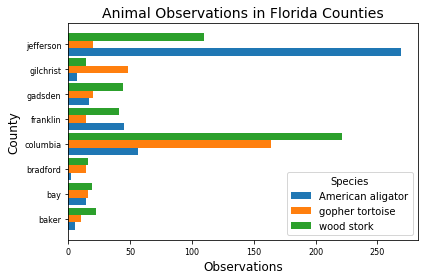

In [23]:
# Create a list of randomly chosen counties to visualize.
plot1_indx_lst = [1, 2, 3, 11, 17, 18, 19, 31]
# These variables will help me arrange the plot.
y_pos = np.arange(len(df.county.iloc[plot1_indx_lst]))
height = 0.3
# Create the plot. I used horizontal bars to provide space to display the county names along the y-axis.
fig, ax = plt.subplots()
ax.barh(y_pos - height, df.aligator_count.iloc[plot1_indx_lst], height=height, label='American aligator')
ax.barh(y_pos, df.tortoise_count.iloc[plot1_indx_lst], height=height, label='gopher tortoise')
ax.barh(y_pos + height, df.stork_count.iloc[plot1_indx_lst], height=height, label='wood stork')
ax.legend(title='Species')
ax.set_title("Animal Observations in Florida Counties", fontsize=14)
ax.set_ylabel("County", fontsize=12, labelpad=4)
ax.set_xlabel("Observations", fontsize=12)
ax.set_yticks(y_pos)
ax.set_yticklabels(df.county.iloc[plot1_indx_lst])
ax.tick_params(axis='both', which='major', labelsize=8)
fig.tight_layout()
plt.show()

## Voter Registration Data

This plot shows the proportion of voters registered to each party, based on the total values for all counties.

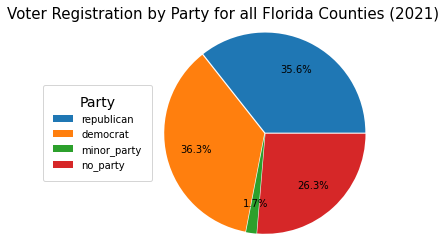

In [24]:
# Create a list of the relevant columns.
vr_col_lst = ['republican', 'democrat', 'minor_party', 'no_party']
# Now calculate the sum of each column in the column list.
voter_sums = [df[v].sum() for v in vr_col_lst]
# Create a pie plot using the summed values.
fig, ax = plt.subplots()
ax.pie(voter_sums, explode=(0.01, 0.01, 0.01, 0.01), autopct='%1.1f%%', pctdistance=0.7, radius=1.5)
ax.legend(vr_col_lst, title="Party", title_fontsize=14, loc="center right", bbox_to_anchor=(-0.15, 0.5), borderpad=1)
ax.set_aspect('equal')
fig.subplots_adjust(left=0.4)
ax.set_title("Voter Registration by Party for all Florida Counties (2021)", fontsize=15, y=1.15, x=0.25)
fig.tight_layout(pad=2.5)
plt.show()

## Registered Voters vs. Hazardous Waste Handlers

This plot compares the number of registered voters and the number of hazardous waste handlers in each county. This plot
uses two different axes to compare data with differing scales. The county names are not displayed in order to keep the
plot readable.

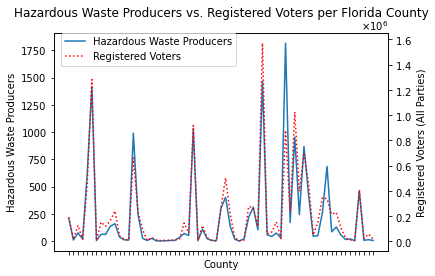

In [25]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(df.county)), 'haz_waste_prods', linestyle='solid', data=df)
ax.set_xticks(np.arange(len(df.county)))
ax.tick_params(labelbottom=False)
ax.set_ylabel("Hazardous Waste Producers")
ax.set_xlabel("County", labelpad=8)
ax2 = ax.twinx()
ax2.plot(np.arange(len(df.county)), 'totals', linestyle='dotted', color='red', data=df)
ax2.ticklabel_format(axis='y', useMathText=True)
ax2.set_ylabel("Registered Voters (All Parties)")
fig.legend(['Hazardous Waste Producers', 'Registered Voters'], loc=(0.14, 0.76))
plt.title("Hazardous Waste Producers vs. Registered Voters per Florida County", y=1.05)
plt.show()

## Hazardous Waste Producers vs. Gopher Tortoise Observations

This plot compares the number of hazardous waste producers to the total number of registered voters.

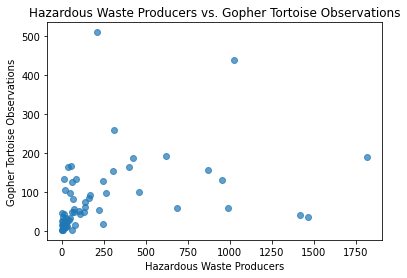

In [26]:
fig, ax = plt.subplots()
ax.scatter('haz_waste_prods', 'tortoise_count', alpha=0.7, data=df)
ax.set_xlabel("Hazardous Waste Producers")
ax.set_ylabel("Gopher Tortoise Observations")
plt.title("Hazardous Waste Producers vs. Gopher Tortoise Observations")
plt.show()

## Correlation Matrix

This plot is a visualization of the full correlation matrix for this data frame.

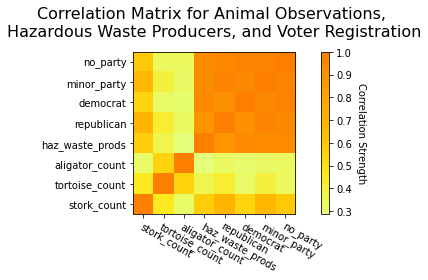

In [27]:
# Create the correlation matrix.
df_corr = df.iloc[:, 1:9].corr()
# Plot the correlation matrix.
fig, ax = plt.subplots()
ax.imshow(df_corr, cmap=plt.cm.Wistia, origin='lower')
ax.figure.colorbar(ax.imshow(df_corr, cmap=plt.cm.Wistia, origin='lower'),
                   ax=ax).ax.set_ylabel("Correlation Strength", rotation=-90, va="bottom")
ax.set_xticks(np.arange(len(df_corr.columns)))
ax.set_xticklabels(df_corr.columns)
ax.set_yticks(np.arange(len(df_corr.columns)))
ax.set_yticklabels(df_corr.columns)
ax.set_title("Correlation Matrix for Animal Observations, \nHazardous Waste Producers, and Voter Registration",
             fontsize=16, pad=16)
plt.setp(ax.get_xticklabels(), rotation=-30, ha="left", rotation_mode="anchor")
plt.tight_layout()
fig.subplots_adjust(left=-0.2)
plt.show()